# Support Vector Machines

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sns.set_style("whitegrid")

In [2]:
data_train = pd.read_excel("./data/pumpFeaturesSVM.xlsx", sheet_name="dataTrain", dtype={'faultCode': 'category'})
data_train.head()

,wMotor_mean,wMotor_std,wMotor_fftPeakIdx,wMotor_skewness,wMotor_kurtosis,wMotor_peak2peak,wMotor_peak2rms,wMotor_rms,wMotor_mad,wMotor_csRange,...,pOut_peak2peak,pOut_peak2rms,pOut_rms,pOut_mad,pOut_csRange,pOut_pLow,pOut_pMid,pOut_pHigh,pOut_pKur,faultCode
0,876.2357,6.2048,762,-0.1646,2.8811,39.0707,1.0183,876.2576,5.0321,1225900,...,0.1255,1.0076,7.2260,0.0190,10109.0,0.000091,0.0075,0.0013,0.0763,Good
1,876.2382,6.0775,762,-0.1471,2.6737,34.5708,1.0170,876.2593,4.9826,1225900,...,0.1209,1.0071,7.2256,0.0190,10109.0,0.000118,0.0070,0.0014,0.0763,Good
2,876.0312,6.2509,762,-0.1235,2.5514,35.4915,1.0173,876.0534,5.1659,1225600,...,0.1312,1.0075,7.2259,0.0190,10109.0,0.000060,0.0066,0.0013,0.0763,Good
3,876.1997,6.0953,762,-0.1393,2.7053,36.0967,1.0181,876.2209,4.9627,1225800,...,0.1238,1.0067,7.2253,0.0191,10108.0,0.000051,0.0078,0.0016,0.0718,Good
4,876.1376,6.1633,762,-0.1416,2.7259,37.5214,1.0181,876.1593,5.0248,1225700,...,0.1273,1.0074,7.2258,0.0187,10109.0,0.000063,0.0070,0.0016,0.0763,Good


In [3]:
data_test = pd.read_excel("./data/pumpFeaturesSVM.xlsx", sheet_name="dataTest", dtype={'faultCode': 'category'})
data_test.head()

,wMotor_mean,wMotor_std,wMotor_fftPeakIdx,wMotor_skewness,wMotor_kurtosis,wMotor_peak2peak,wMotor_peak2rms,wMotor_rms,wMotor_mad,wMotor_csRange,...,pOut_peak2peak,pOut_peak2rms,pOut_rms,pOut_mad,pOut_csRange,pOut_pLow,pOut_pMid,pOut_pHigh,pOut_pKur,faultCode
0,876.1967,6.2475,762,-0.1346,2.7289,41.5295,1.0189,876.2189,5.0936,1225800,...,0.1233,1.0078,7.2259,0.0187,10109.0,0.000066,0.0072,0.0014,0.0763,Good
1,876.3714,6.1812,762,-0.0960,2.7291,42.7099,1.0219,876.3932,5.0910,1226100,...,0.1246,1.0080,7.2260,0.0190,10109.0,0.000037,0.0071,0.0014,0.0763,Good
2,876.1230,6.0332,762,-0.0812,2.7566,34.5171,1.0179,876.1438,4.9032,1225700,...,0.1181,1.0069,7.2256,0.0190,10108.0,0.000027,0.0081,0.0015,0.0763,Good
3,876.2149,6.2081,762,-0.0555,2.6653,35.4141,1.0196,876.2369,5.0436,1225800,...,0.1193,1.0064,7.2256,0.0190,10108.0,0.000032,0.0072,0.0015,0.0763,Good
4,876.1159,6.1660,762,-0.1688,2.7116,36.9274,1.0180,876.1376,5.0401,1225700,...,0.1214,1.0075,7.2258,0.0191,10109.0,0.000049,0.0074,0.0016,0.0763,Good


In [4]:
X_train, y_train, X_test, y_test = data_train.iloc[:, :-1], data_train.iloc[:, -1], data_test.iloc[:, :-1], data_test.iloc[:, -1]

This function is used to evaluate a model by displaying the confusion chart and accuracy.

In [5]:
def eval_model(X_test, y_test, model):
    print("Accuracy:", model.score(X_test, y_test))
    cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)

    plt.figure()
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot();
    plt.grid(visible=False)
    plt.show()

To construct a Support Vector Machine (SVM), we can use the [SVC()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn-svm-svc) class.

In [6]:
classifier = SVC(gamma='auto')
classifier.fit(X_train, y_train)

SVC(gamma='auto')

Evaluate model.

Accuracy: 0.5952380952380952


<Figure size 640x480 with 0 Axes>

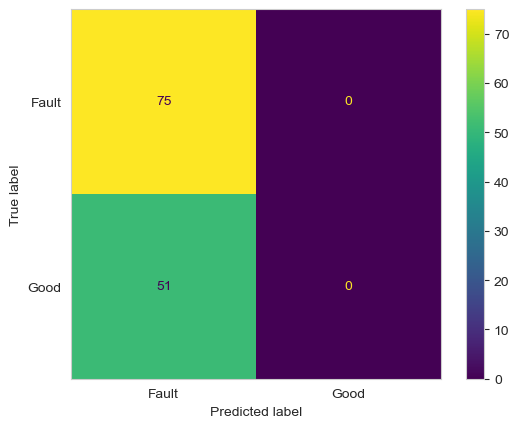

In [7]:
eval_model(X_test, y_test, classifier)

The optimal hyperplane of the SVM optimization is influenced by the scale of the input data. Therefore, it is recommended to standardize the data when using this algorithm. We can do this prior to training using the [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler) class. Alternatively, we can create a Pipeline using the [make_pipeline()](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn-pipeline-make-pipeline) function. 

In [8]:
classifier = make_pipeline(StandardScaler(), SVC(gamma='auto'))
classifier.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Evaluate model.

Accuracy: 0.9523809523809523


<Figure size 640x480 with 0 Axes>

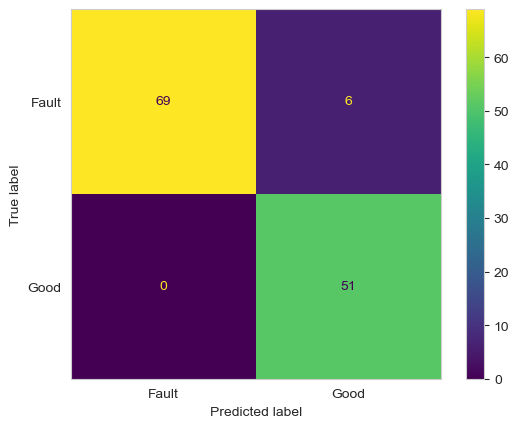

In [9]:
eval_model(X_test, y_test, classifier)

By default, SVC uses a "rbf" support vector. We can modify this by changing the "kernel" property.

In [10]:
classifier = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel="poly"))
classifier.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='poly'))])

Evaluate model.

Accuracy: 0.873015873015873


<Figure size 640x480 with 0 Axes>

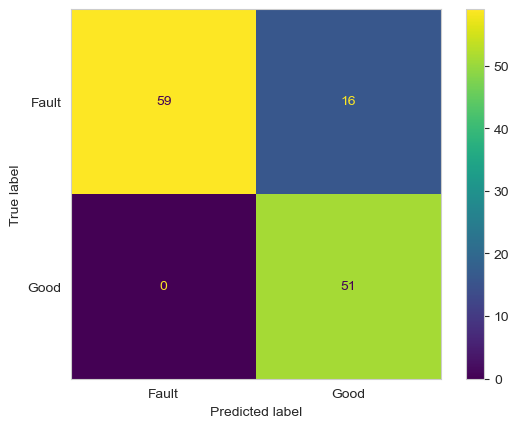

In [11]:
eval_model(X_test, y_test, classifier)